#### Importando as dependências

In [1]:
from quantumnet.components import Network, Host
from quantumnet.objects import Qubit, Logger
import random
Logger.activate(Logger)

#### Instânciando a rede e setando a topologia

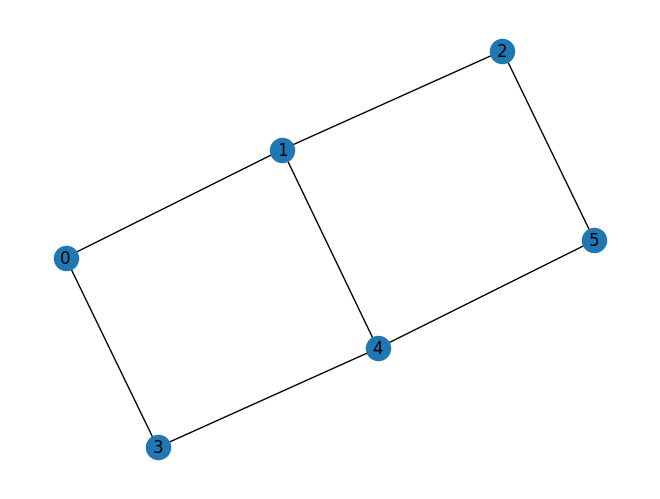

In [2]:
rede = Network()
rede.set_ready_topology("Grade", 2, 3)
rede.draw()

#### Criando pares EPR

In [3]:
# alice = rede.get_host(0)
# bob = rede.get_host(1)

##### Usando arestas aleatórias

In [4]:

arestas = list(rede.edges)
print(arestas)

#Randomizando arestas
aresta_aleatorias = random.sample(arestas, 1)[0]
print(aresta_aleatorias)

#atribuindo hosts a aresta
x,y = aresta_aleatorias
alice = rede.get_host(x)
bob = rede.get_host(y)

[(0, 3), (0, 1), (1, 4), (1, 2), (2, 5), (3, 4), (4, 5)]
(3, 4)


In [5]:
#Fazer um for pra executar o protocolo pra cada aresta escolhida.
for aresta in arestas:
    x, y = aresta
    alice = rede.get_host(x)
    bob = rede.get_host(y)
    print(f"Aresta {aresta}: alice = {alice}, bob = {bob}")
    
    # Criação de pares EPR
    alice.add_qubit(Qubit(0))
    bob.add_qubit(Qubit(1))

    # Acessando a memória dos hosts
    print(alice.memory)
    print(bob.memory)
    print("Canais: ", rede.edges)

    # Usando as funções da camada física
    rede.start_hosts_and_channels()
    rede.physical.echp_on_replay(x, y)

    # acessando as arestas
    rede.edges[x, y]


2024-06-02 23:04:00,749: Qubit 0 adicionado à memória do Host 0.
2024-06-02 23:04:00,750: Qubit 1 adicionado à memória do Host 3.


Aresta (0, 3): alice = 0, bob = 3
Canais:  [(0, 3), (0, 1), (1, 4), (1, 2), (2, 5), (3, 4), (4, 5)]


AttributeError: 'Network' object has no attribute 'start_hosts_and_channels'